In [25]:
# Database and data manipulation
import sqlite3
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations
sns.set(style="darkgrid")  # Set a clean style for Seaborn
plt.rcParams["figure.figsize"] = (10, 6)  # Set default figure size

# Suppress warnings (optional)
import warnings
warnings.filterwarnings("ignore")

  Category  TotalSales
0  Spirits    60430.71
1     Beer    58121.05
2     Wine    34107.46


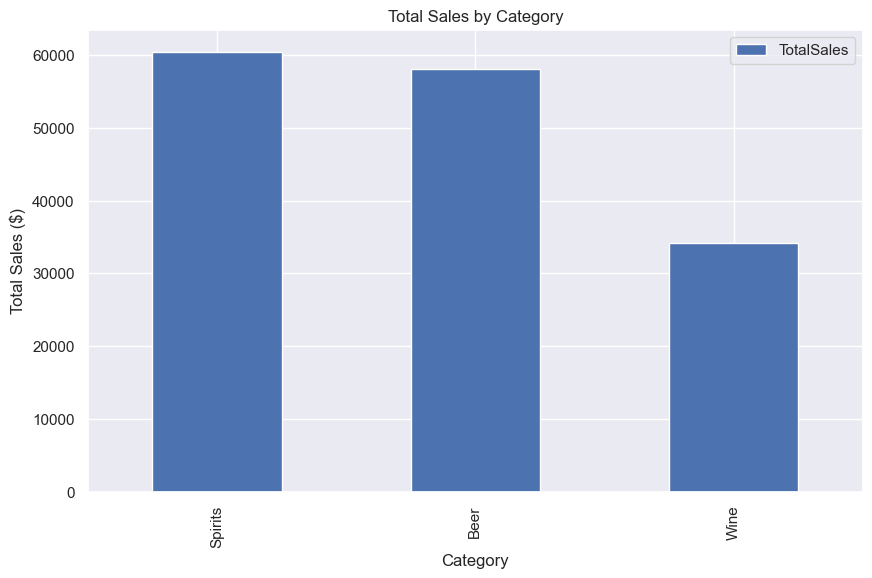

In [26]:
# Query: Total sales by category
query = """
SELECT p.Category, SUM(s.TotalAmount) AS TotalSales
FROM Sales s
JOIN Products p ON s.ProductID = p.ProductID
GROUP BY p.Category
ORDER BY TotalSales DESC
"""

# Use context manager to query the database
with sqlite3.connect("../data/sales_data.db") as conn:
    df = pd.read_sql_query(query, conn)

# Display the results
print(df)

# Visualize the results
df.plot(kind="bar", x="Category", y="TotalSales", title="Total Sales by Category")
plt.ylabel("Total Sales ($)")
plt.show()

      Month  TotalSales
0   2024-05     7146.80
1   2024-06    11859.51
2   2024-07    13970.81
3   2024-08    16996.69
4   2024-09    12077.27
5   2024-10     6335.59
6   2024-11    16702.63
7   2024-12    12796.91
8   2025-01    10328.44
9   2025-02    12427.64
10  2025-03    13601.28
11  2025-04    14573.88
12  2025-05     3841.77


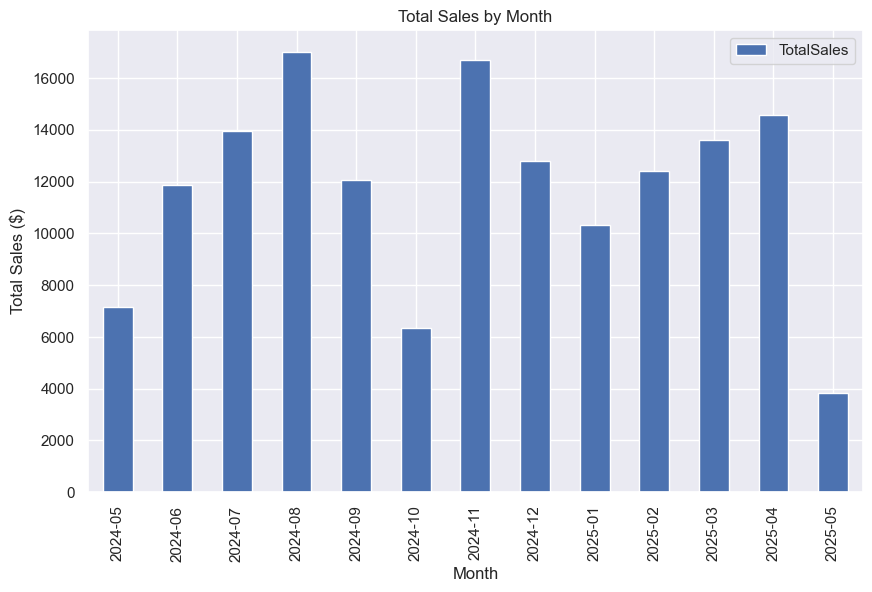

In [27]:
# Query: Total sales by month
query = """
SELECT strftime('%Y-%m', s.SaleDate) AS Month, SUM(s.TotalAmount) AS TotalSales
FROM Sales s
GROUP BY Month
ORDER BY Month
"""

# Use context manager to query the database
with sqlite3.connect("../data/sales_data.db") as conn:
    df_monthly = pd.read_sql_query(query, conn)

# Display the results
print(df_monthly)

# Visualize the results
df_monthly.plot(kind="bar", x="Month", y="TotalSales", title="Total Sales by Month")
plt.ylabel("Total Sales ($)")
plt.show()

  Quarter  TotalSales
0      Q1    36357.36
1      Q2    37421.96
2      Q3    43044.77
3      Q4    35835.13


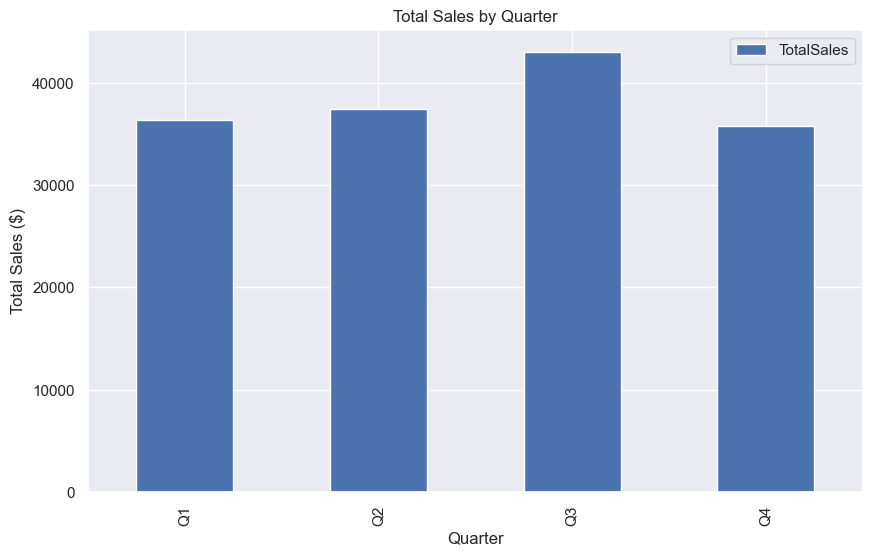

In [28]:
# Query: Total sales by quarter
query = """
SELECT 
    CASE 
        WHEN CAST(strftime('%m', s.SaleDate) AS INTEGER) BETWEEN 1 AND 3 THEN 'Q1'
        WHEN CAST(strftime('%m', s.SaleDate) AS INTEGER) BETWEEN 4 AND 6 THEN 'Q2'
        WHEN CAST(strftime('%m', s.SaleDate) AS INTEGER) BETWEEN 7 AND 9 THEN 'Q3'
        WHEN CAST(strftime('%m', s.SaleDate) AS INTEGER) BETWEEN 10 AND 12 THEN 'Q4'
    END AS Quarter,
    SUM(s.TotalAmount) AS TotalSales
FROM Sales s
GROUP BY Quarter
ORDER BY Quarter
"""

# Use context manager to query the database
with sqlite3.connect("../data/sales_data.db") as conn:
    df_quarterly = pd.read_sql_query(query, conn)

# Display the results
print(df_quarterly)

# Visualize the results
df_quarterly.plot(kind="bar", x="Quarter", y="TotalSales", title="Total Sales by Quarter")
plt.ylabel("Total Sales ($)")
plt.show()

   DayOfWeek  TotalSales
0     Monday    30169.00
1    Tuesday    20083.58
2  Wednesday    23383.16
3   Thursday    17178.51
4     Friday    17838.63
5   Saturday    19045.77
6     Sunday    24960.57


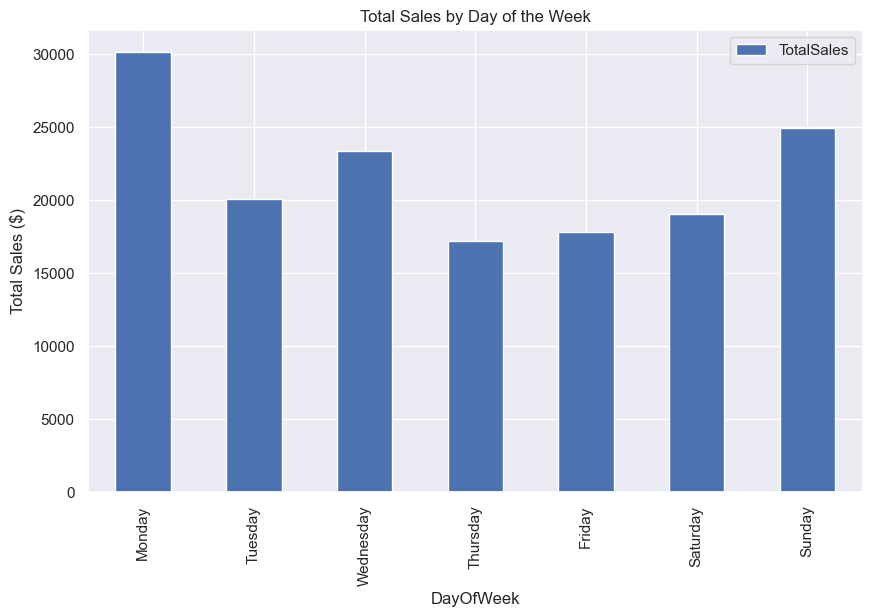

In [29]:
# Query: Total sales by day of the week (ordered Monday to Sunday)
query = """
SELECT 
    CASE strftime('%w', s.SaleDate)
        WHEN '0' THEN 'Sunday'
        WHEN '1' THEN 'Monday'
        WHEN '2' THEN 'Tuesday'
        WHEN '3' THEN 'Wednesday'
        WHEN '4' THEN 'Thursday'
        WHEN '5' THEN 'Friday'
        WHEN '6' THEN 'Saturday'
    END AS DayOfWeek,
    SUM(s.TotalAmount) AS TotalSales
FROM Sales s
GROUP BY DayOfWeek
ORDER BY 
    CASE strftime('%w', s.SaleDate)
        WHEN '1' THEN 1
        WHEN '2' THEN 2
        WHEN '3' THEN 3
        WHEN '4' THEN 4
        WHEN '5' THEN 5
        WHEN '6' THEN 6
        WHEN '0' THEN 7
    END
"""

# Use context manager to query the database
with sqlite3.connect("../data/sales_data.db") as conn:
    df_weekly = pd.read_sql_query(query, conn)

# Display the results
print(df_weekly)

# Visualize the results
df_weekly.plot(kind="bar", x="DayOfWeek", y="TotalSales", title="Total Sales by Day of the Week")
plt.ylabel("Total Sales ($)")
plt.show()

      SaleDate  DailySales  Rolling7DaySales
0   2024-05-08      698.02               NaN
1   2024-05-12      100.48               NaN
2   2024-05-13     1261.34               NaN
3   2024-05-16      202.44               NaN
4   2024-05-17      976.40               NaN
..         ...         ...               ...
272 2025-05-03      453.67           2316.11
273 2025-05-04      457.63           2732.86
274 2025-05-05     1654.02           3888.16
275 2025-05-06      424.78           4032.27
276 2025-05-08      674.40           4397.97

[277 rows x 3 columns]


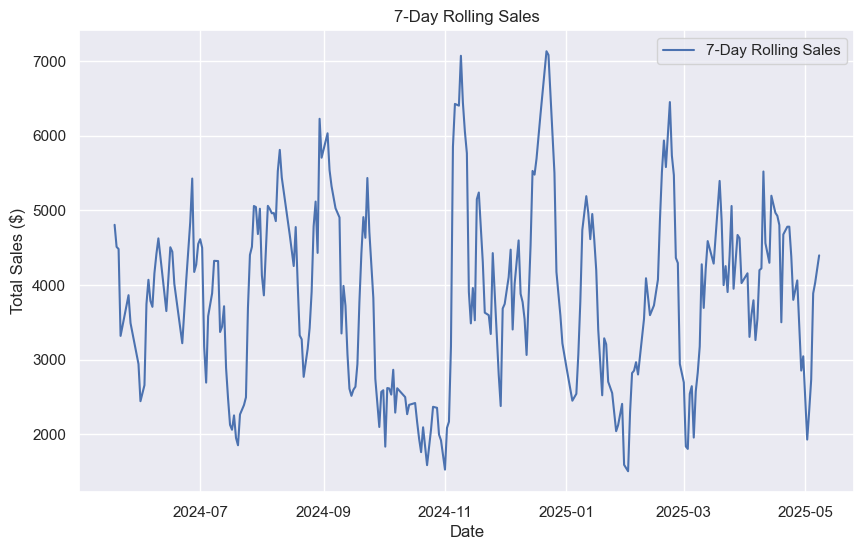

In [30]:
# Query: Daily sales
query = """
SELECT s.SaleDate, SUM(s.TotalAmount) AS DailySales
FROM Sales s
GROUP BY s.SaleDate
ORDER BY s.SaleDate
"""

# Use context manager to query the database
with sqlite3.connect("../data/sales_data.db") as conn:
    df_daily = pd.read_sql_query(query, conn)

# Convert SaleDate to datetime
df_daily['SaleDate'] = pd.to_datetime(df_daily['SaleDate'])

# Calculate rolling 7-day sales
df_daily['Rolling7DaySales'] = df_daily['DailySales'].rolling(window=7).sum()

# Display the results
print(df_daily)

# Visualize the results
plt.plot(df_daily['SaleDate'], df_daily['Rolling7DaySales'], label="7-Day Rolling Sales")
plt.title("7-Day Rolling Sales")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.legend()
plt.show()

In [31]:
query = """
SELECT sp.SupplierName, SUM(s.TotalAmount) AS TotalSales
FROM Sales s
JOIN Products p ON s.ProductID = p.ProductID
JOIN Suppliers sp ON p.SupplierID = sp.SupplierID
GROUP BY sp.SupplierName
ORDER BY TotalSales DESC
"""
with sqlite3.connect("../data/sales_data.db") as conn:
    df_suppliers = pd.read_sql_query(query, conn)
print(df_suppliers)

                  SupplierName  TotalSales
0                 Gonzalez PLC    24194.36
1                  Avila Group    23654.35
2                  Garza-Brown    18049.38
3                     Mays Inc    15924.25
4       Moore, Lam and Edwards    14890.36
5                   Yang-Scott    14219.50
6                 Smith-Galvan    12454.09
7  Steele, Gonzalez and Foster    11582.48
8    Green, Braun and Peterson     9520.87
9               Adams-Melendez     8169.58


      Month Category  TotalSales
0   2024-05     Beer     3566.14
1   2024-05  Spirits     2695.71
2   2024-05     Wine      884.95
3   2024-06     Beer     5625.65
4   2024-06  Spirits     3307.23
5   2024-06     Wine     2926.63
6   2024-07     Beer     4500.59
7   2024-07  Spirits     7419.28
8   2024-07     Wine     2050.94
9   2024-08     Beer     4634.94
10  2024-08  Spirits     8066.56
11  2024-08     Wine     4295.19
12  2024-09     Beer     4837.09
13  2024-09  Spirits     5699.03
14  2024-09     Wine     1541.15
15  2024-10     Beer     1974.60
16  2024-10  Spirits     2702.85
17  2024-10     Wine     1658.14
18  2024-11     Beer     5126.64
19  2024-11  Spirits     9009.54
20  2024-11     Wine     2566.45
21  2024-12     Beer     4586.87
22  2024-12  Spirits     4323.52
23  2024-12     Wine     3886.52
24  2025-01     Beer     4006.82
25  2025-01  Spirits     3818.08
26  2025-01     Wine     2503.54
27  2025-02     Beer     3852.71
28  2025-02  Spirits     4353.11
29  2025-0

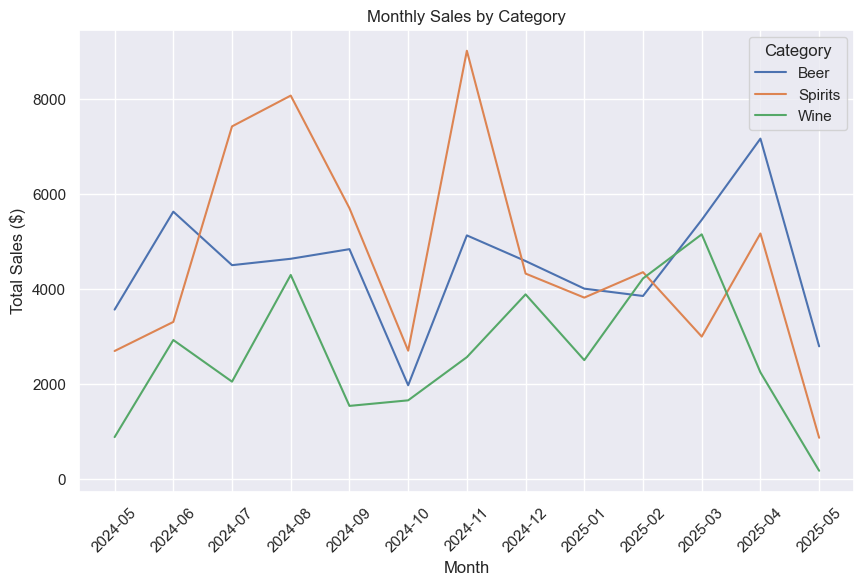

In [32]:
# Query: Monthly sales by category
query = """
SELECT strftime('%Y-%m', s.SaleDate) AS Month, p.Category, SUM(s.TotalAmount) AS TotalSales
FROM Sales s
JOIN Products p ON s.ProductID = p.ProductID
GROUP BY Month, p.Category
ORDER BY Month, p.Category
"""

# Use context manager to query the database
with sqlite3.connect("../data/sales_data.db") as conn:
    df_monthly_category = pd.read_sql_query(query, conn)

# Display the results
print(df_monthly_category)

# Optional: Visualize the results
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=df_monthly_category, x="Month", y="TotalSales", hue="Category")
plt.title("Monthly Sales by Category")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()

In [34]:

query = """
SELECT sp.Region, SUM(s.TotalAmount) AS TotalSales
FROM Sales s
JOIN Products p ON s.ProductID = p.ProductID
JOIN Suppliers sp ON p.SupplierID = sp.SupplierID
GROUP BY sp.Region
ORDER BY TotalSales DESC

"""

# Use context manager to query the database
with sqlite3.connect("../data/sales_data.db") as conn:
    df_sales_by_region = pd.read_sql_query(query, conn)
    
print(df_sales_by_region)

        Region  TotalSales
0      Alabama    24194.36
1     Delaware    23654.35
2         Iowa    18049.38
3   California    15924.25
4        Maine    14890.36
5     Oklahoma    14219.50
6   Washington    12454.09
7  Connecticut    11582.48
8     Illinois     9520.87
9    Louisiana     8169.58


          ProductName  SalesCount  PercentOfTotal
0        Size Spirits          18             3.6
1         Friend Beer          17             3.4
2          Money Wine          16             3.2
3         His Spirits          16             3.2
4        Receive Beer          14             2.8
5           Push Wine          14             2.8
6           Half Wine          14             2.8
7         Arrive Beer          14             2.8
8        Another Beer          14             2.8
9         Method Wine          13             2.6
10             A Beer          13             2.6
11       Mention Beer          11             2.2
12       Many Spirits          11             2.2
13          Foot Beer          11             2.2
14     Follow Spirits          11             2.2
15          Fall Wine          11             2.2
16      Where Spirits          10             2.0
17      Third Spirits          10             2.0
18      Their Spirits          10             2.0


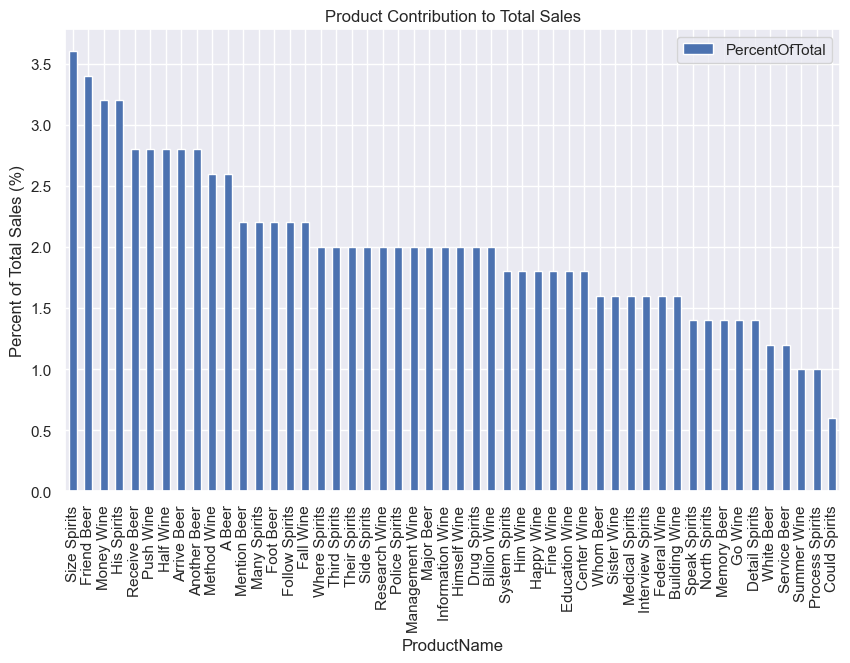

In [35]:
# Query: Product sales count
query = """
SELECT p.ProductName, COUNT(DISTINCT s.SaleID) AS SalesCount
FROM Sales s
JOIN Products p ON s.ProductID = p.ProductID
GROUP BY p.ProductName
ORDER BY SalesCount DESC
"""

# Use context manager to query the database
with sqlite3.connect("../data/sales_data.db") as conn:
    df_product_sales = pd.read_sql_query(query, conn)

# Calculate percent of total sales
df_product_sales['PercentOfTotal'] = (df_product_sales['SalesCount'] / df_product_sales['SalesCount'].sum()) * 100

# Print the DataFrame with PercentOfTotal
print(df_product_sales)

# Optional: Visualize the results
df_product_sales.plot(kind="bar", x="ProductName", y="PercentOfTotal", title="Product Contribution to Total Sales")
plt.ylabel("Percent of Total Sales (%)")
plt.xticks(rotation=90)
plt.show()

   Year Category  TotalSales  YearlyGrowth
0  2024  Spirits    43223.72           NaN
1  2025  Spirits    17206.99    -60.190863


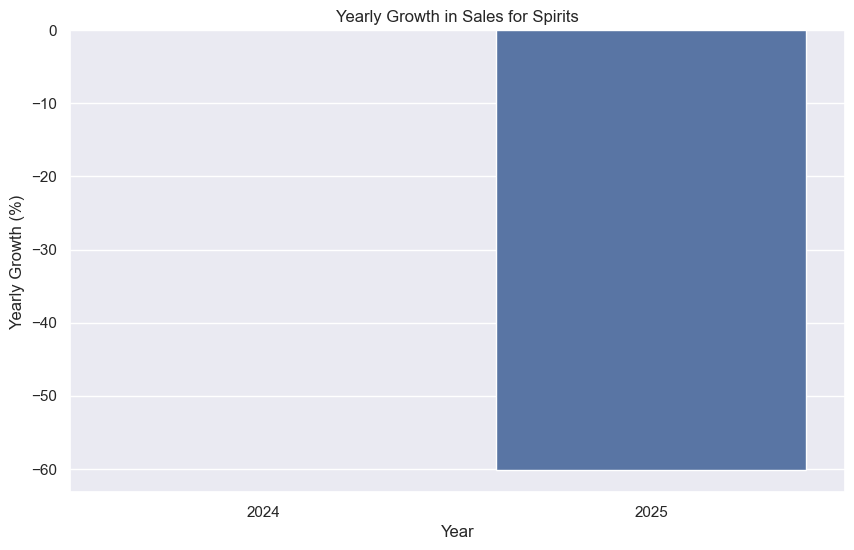

In [36]:
# Query: Yearly sales for Spirits
query = """
SELECT strftime('%Y', s.SaleDate) AS Year, p.Category, SUM(s.TotalAmount) AS TotalSales
FROM Sales s
JOIN Products p ON s.ProductID = p.ProductID
WHERE p.Category = 'Spirits'
GROUP BY Year, p.Category
ORDER BY Year
"""

# Use context manager to query the database
with sqlite3.connect("../data/sales_data.db") as conn:
    df_yearly_spirits = pd.read_sql_query(query, conn)

# Calculate yearly growth
df_yearly_spirits['YearlyGrowth'] = df_yearly_spirits['TotalSales'].pct_change() * 100

# Print the DataFrame with YearlyGrowth
print(df_yearly_spirits)

# Visualize the results
sns.barplot(data=df_yearly_spirits, x="Year", y="YearlyGrowth")
plt.title("Yearly Growth in Sales for Spirits")
plt.ylabel("Yearly Growth (%)")
plt.xlabel("Year")
plt.show()